# A. Optimizing Group Fitness Class Utilization

## Importing Libraries and Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/dataset111/problem2.csv'
fitness_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
fitness_data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


## Data Overview and Missing Values

In [3]:
# Checking for missing values
missing_values = fitness_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Summary statistics of the dataset
fitness_data.describe(include='all')

Missing Values:
 booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
count,1500.000000,1500.000000,1480.000000,1500,1500,1500,1500,1500.000000
unique,NaN,NaN,NaN,31,10,2,6,NaN
top,NaN,NaN,NaN,10,Fri,AM,HIIT,NaN
freq,NaN,NaN,NaN,293,279,1141,667,NaN
mean,750.500000,15.628667,82.610378,NaN,NaN,NaN,NaN,0.302667
std,433.157015,12.926543,12.765859,NaN,NaN,NaN,NaN,0.459565
min,1.000000,1.000000,55.410000,NaN,NaN,NaN,NaN,0.000000
25%,375.750000,8.000000,73.490000,NaN,NaN,NaN,NaN,0.000000
50%,750.500000,12.000000,80.760000,NaN,NaN,NaN,NaN,0.000000
75%,1125.250000,19.000000,89.520000,NaN,NaN,NaN,NaN,1.000000


In [4]:
# Impute missing values in the 'weight' column with the median
fitness_data['weight'].fillna(fitness_data['weight'].median(), inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = fitness_data.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)

Missing Values After Imputation:
 booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64


/tmp/ipykernel_33/1629829601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fitness_data['weight'].fillna(fitness_data['weight'].median(), inplace=True)


## EDA

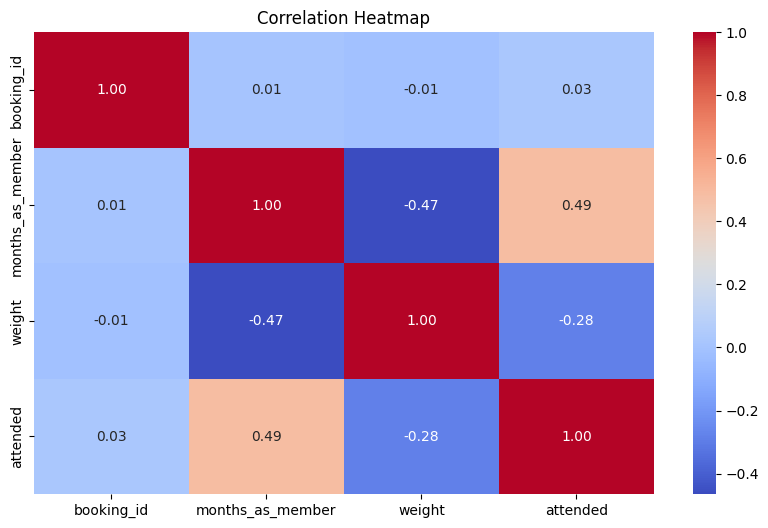

In [5]:
fitness_data_cleaned = fitness_data.apply(pd.to_numeric, errors='coerce')

# Drop columns that could not be converted to numeric
fitness_data_cleaned = fitness_data_cleaned.dropna(axis=1, how='any')

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(fitness_data_cleaned.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


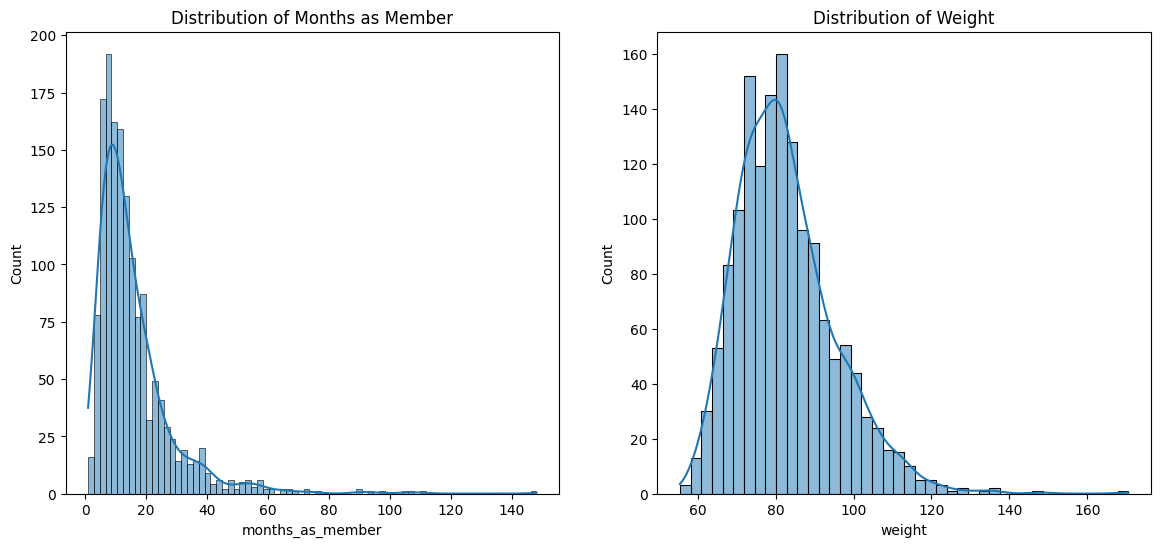

In [6]:
# Visualizing the distribution of 'months_as_member' and 'weight'
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(fitness_data['months_as_member'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Months as Member')
sns.histplot(fitness_data['weight'], kde=True, ax=ax[1])
ax[1].set_title('Distribution of Weight')
plt.show()

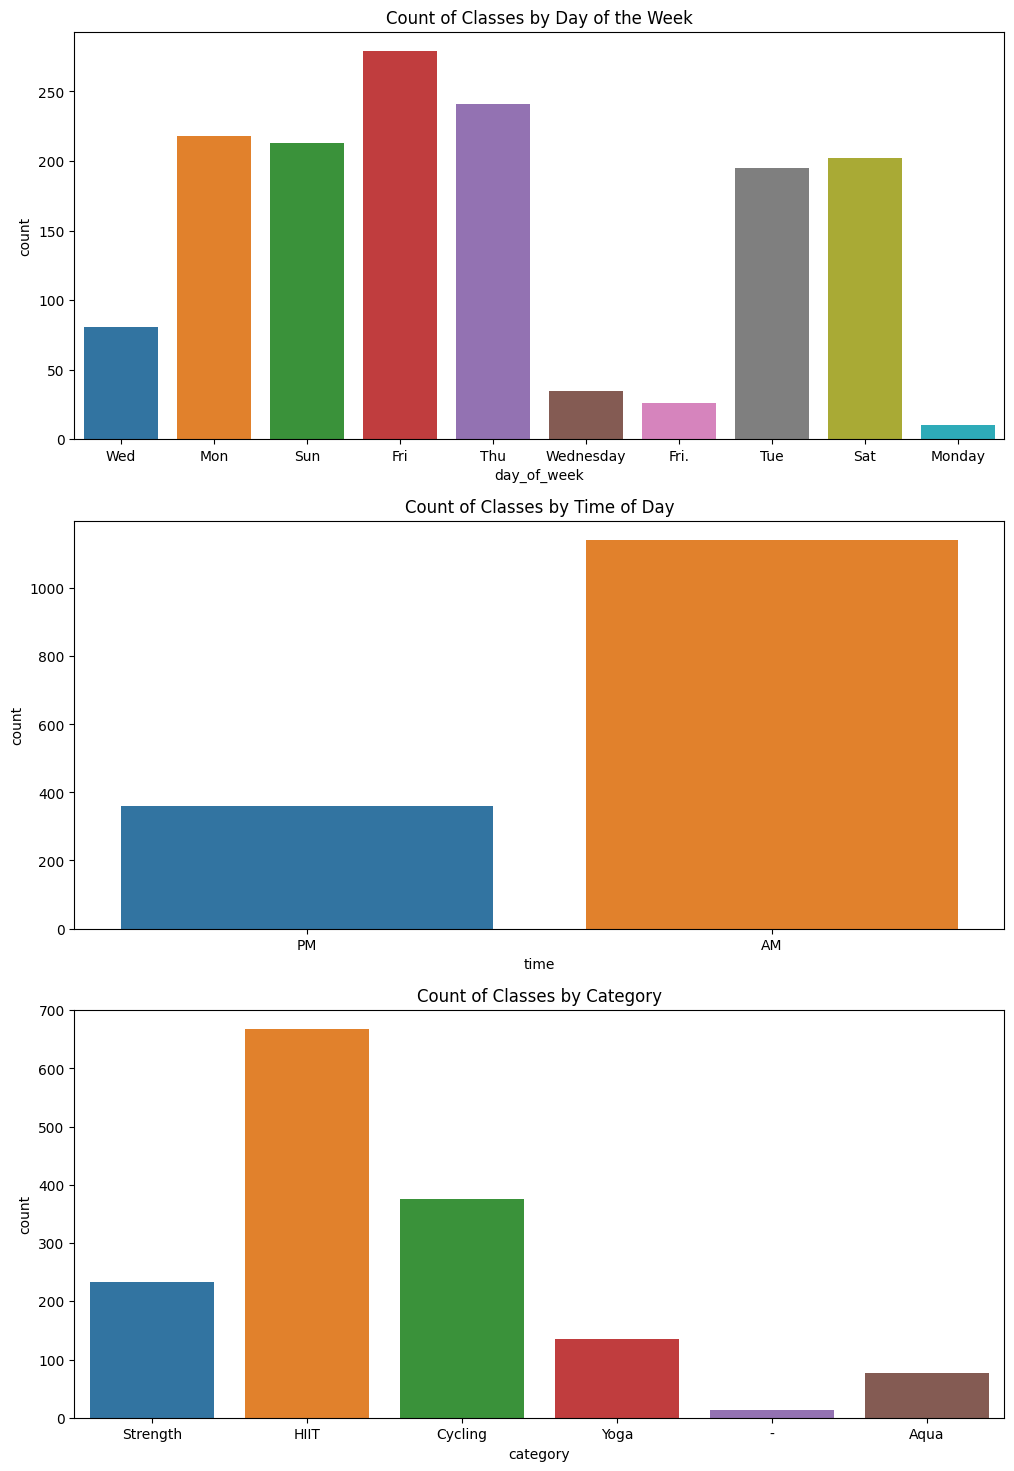

In [7]:
# Count plots for categorical features
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
sns.countplot(x='day_of_week', data=fitness_data, ax=ax[0])
ax[0].set_title('Count of Classes by Day of the Week')
sns.countplot(x='time', data=fitness_data, ax=ax[1])
ax[1].set_title('Count of Classes by Time of Day')
sns.countplot(x='category', data=fitness_data, ax=ax[2])
ax[2].set_title('Count of Classes by Category')
plt.show()

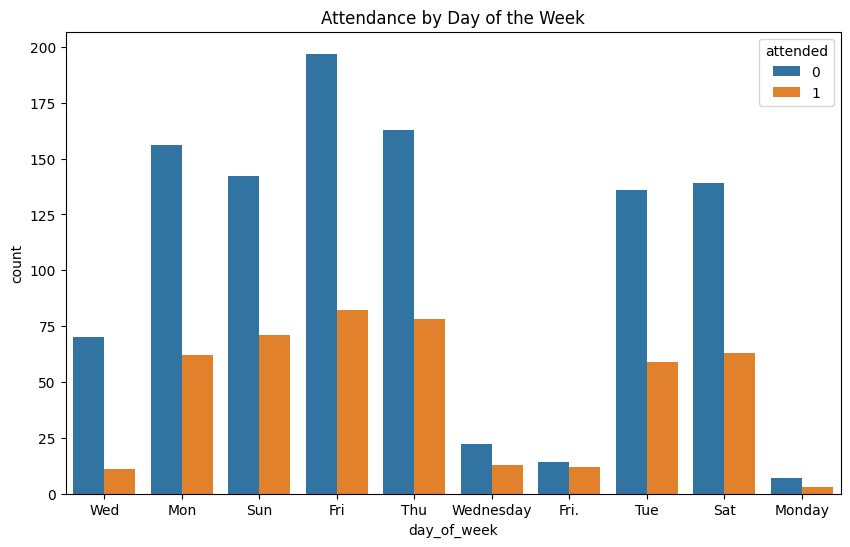

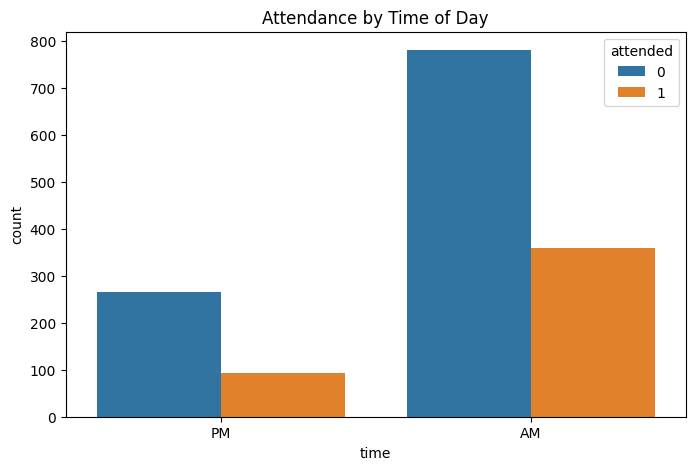

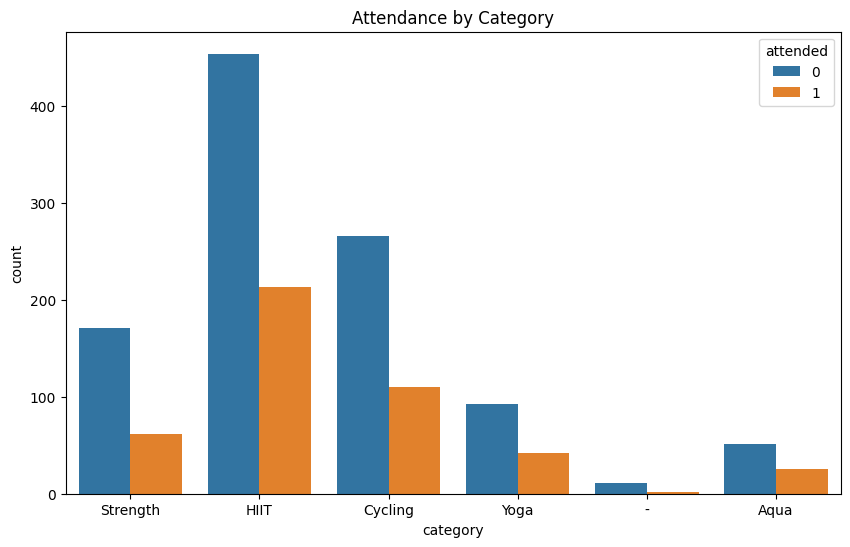

In [8]:
# Attendance rate by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='attended', data=fitness_data)
plt.title('Attendance by Day of the Week')
plt.show()

# Attendance rate by time of day
plt.figure(figsize=(8, 5))
sns.countplot(x='time', hue='attended', data=fitness_data)
plt.title('Attendance by Time of Day')
plt.show()

# Attendance rate by category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='attended', data=fitness_data)
plt.title('Attendance by Category')
plt.show()

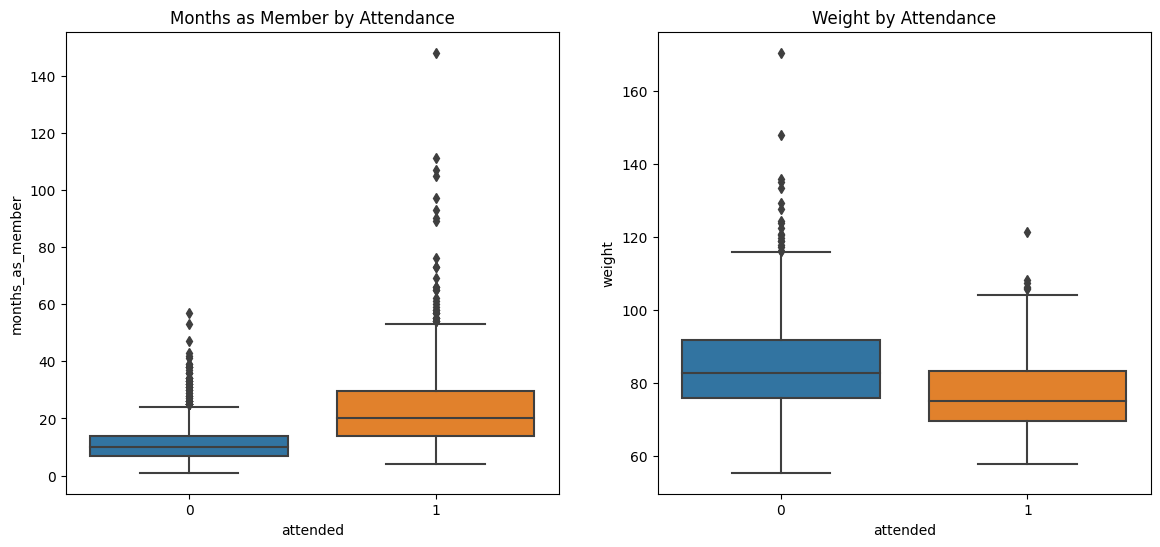

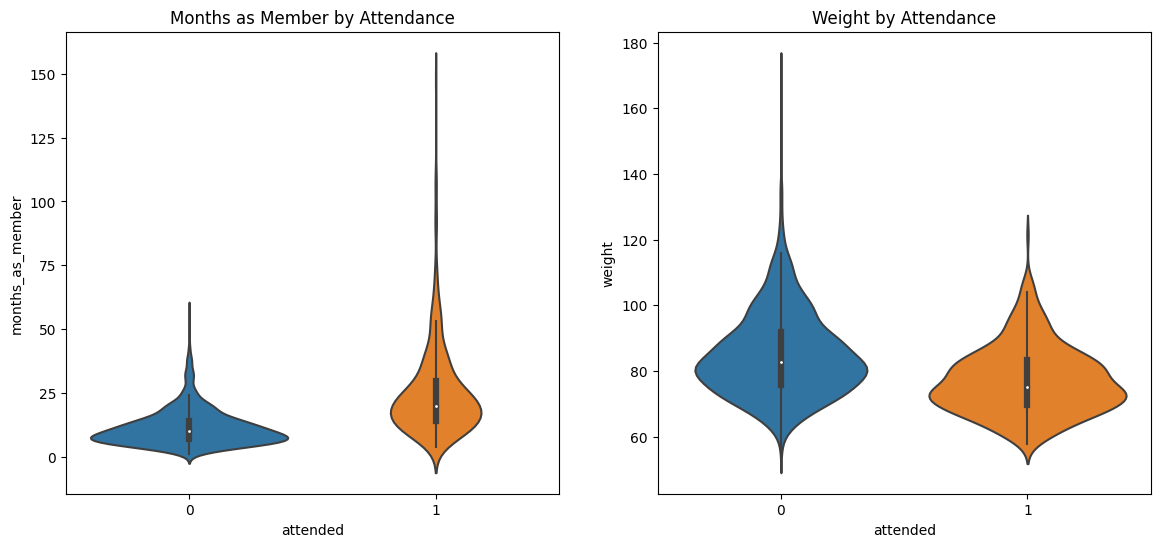

In [9]:
# Boxplot of numerical features by attendance
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='attended', y='months_as_member', data=fitness_data, ax=ax[0])
ax[0].set_title('Months as Member by Attendance')
sns.boxplot(x='attended', y='weight', data=fitness_data, ax=ax[1])
ax[1].set_title('Weight by Attendance')
plt.show()

# Violin plot of numerical features by attendance
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.violinplot(x='attended', y='months_as_member', data=fitness_data, ax=ax[0])
ax[0].set_title('Months as Member by Attendance')
sns.violinplot(x='attended', y='weight', data=fitness_data, ax=ax[1])
ax[1].set_title('Weight by Attendance')
plt.show()

## Model Building

In [10]:
# Cleaning the 'days_before' column by removing the ' days' string and converting to integer
fitness_data['days_before'] = fitness_data['days_before'].str.replace(' days', '').astype(int)

# Verify the change
print(fitness_data['days_before'].head())
# Convert 'days_before' to string if it is not already
fitness_data['days_before'] = fitness_data['days_before'].astype(str)

# Now clean the 'days_before' column by removing ' days' and converting to integer
fitness_data['days_before'] = fitness_data['days_before'].str.replace(' days', '').astype(int)
# Impute missing values in the 'weight' column with the median
fitness_data['weight'] = fitness_data['weight'].fillna(fitness_data['weight'].median())


0     8
1     2
2    14
3    10
4     8
Name: days_before, dtype: int64


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Handling missing values in the 'weight' column without using inplace
fitness_data['weight'] = fitness_data['weight'].fillna(fitness_data['weight'].median())

# Convert 'days_before' to string if it is not already
fitness_data['days_before'] = fitness_data['days_before'].astype(str)

# Cleaning the 'days_before' column by removing ' days' and converting to integer
fitness_data['days_before'] = fitness_data['days_before'].str.replace(' days', '').astype(int)

# Encoding categorical variables
label_encoder = LabelEncoder()
fitness_data['day_of_week'] = label_encoder.fit_transform(fitness_data['day_of_week'])
fitness_data['time'] = label_encoder.fit_transform(fitness_data['time'])
fitness_data['category'] = label_encoder.fit_transform(fitness_data['category'])

# Defining features and target variable
X = fitness_data.drop(['booking_id', 'attended'], axis=1)
y = fitness_data['attended']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)


## Model Evaluation

In [14]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7377777777777778
Confusion Matrix:
 [[277  16]
 [102  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.95      0.82       293
           1       0.77      0.35      0.48       157

    accuracy                           0.74       450
   macro avg       0.75      0.65      0.65       450
weighted avg       0.75      0.74      0.71       450



Accuracy: The model achieved an accuracy of 73.8%, meaning that it correctly predicted the attendance status for approximately 74% of the samples in the test set.

Confusion Matrix:
True Negatives (277): The model correctly predicted that 277 members would not attend the class.
False Positives (16): The model incorrectly predicted that 16 members would attend the class when they did not.
False Negatives (102): The model incorrectly predicted that 102 members would not attend the class when they actually did.
True Positives (55): The model correctly predicted that 55 members would attend the class.

Precision and Recall:
For Class 0 (Not Attended): The precision was 0.73, and recall was 0.95, indicating that the model is very good at identifying members who will not attend.
For Class 1 (Attended): The precision was 0.77, but the recall was only 0.35, meaning the model struggles to identify members who will actually attend.

Key Observations:

Imbalance in Class Prediction:

The model is significantly better at predicting non-attendance (Class 0) compared to predicting attendance (Class 1). This imbalance is evident from the high recall for Class 0 (95%) versus the low recall for Class 1 (35%).
False Negatives:

The high number of false negatives (102) indicates that the model frequently fails to predict when a member will attend a class. This could lead to a situation where available class spots are underestimated, resulting in inefficiencies in class utilization.
Potential Improvements:

Class Weight Adjustment: Adjusting the class weights in the logistic regression model to place more emphasis on the minority class (Class 1) could help improve the recall for members who will attend.

Feature Engineering: Additional features or interactions between features could improve the model's predictive power.

Alternative Models: Experimenting with other machine learning models such as decision trees, random forests, or boosting algorithms may yield better performance, especially for imbalanced data.